In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()


from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [2]:
diabetes_data = pd.read_csv('health care diabetes.csv')
print(diabetes_data.shape)

(768, 9)


In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000239A2A9B048>,
      dtype=object)

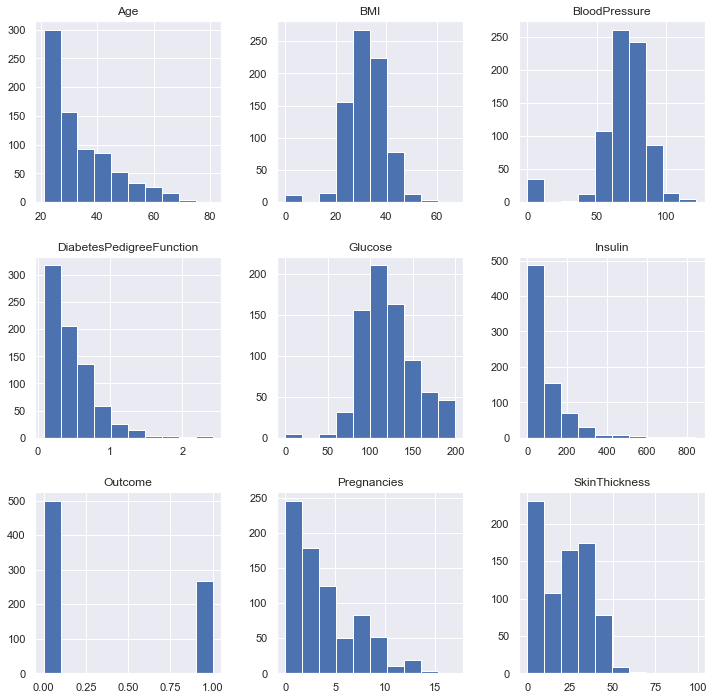

In [5]:
diabetes_data.hist(figsize =(12,12))

In [6]:
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diabetes_data.iloc[:,1:6].head(8)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1
5,116,74,0,0,25.6
6,78,50,32,88,31.0
7,115,0,0,0,35.3


In [8]:
diabetes_data.iloc[:,1:6] = diabetes_data.iloc[:,1:6].replace(0,np.nan)
diabetes_data.head(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0


In [9]:
diabetes_data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
diabetes_data['Glucose'] =diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean())
diabetes_data['BloodPressure'] =diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean())
diabetes_data['SkinThickness'] =diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median())
diabetes_data['Insulin'] =diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median())
diabetes_data['BMI'] =diabetes_data['BMI'].fillna(diabetes_data['BMI'].mean())

In [11]:
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
diabetes_data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [14]:
counts = diabetes_data.dtypes.value_counts()
counts

float64    6
int64      3
dtype: int64

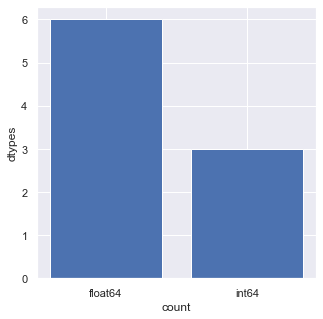

In [15]:
x = ['float64','int64']
y = [6,3]

plt.figure(figsize=(5,5))
plt.bar(x,y)
plt.xlabel('count')
plt.ylabel('dtypes')
plt.show()

In [16]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

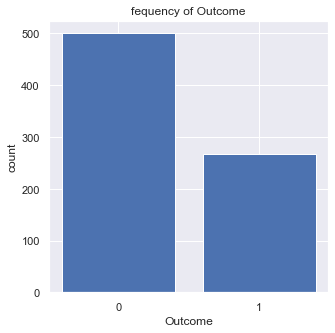

In [17]:
x = ['0','1']
y = [500,268]

plt.figure(figsize =(5,5));
plt.bar(x,y)
plt.xlabel('Outcome') 
plt.ylabel('count')
plt.title("fequency of Outcome")
plt.show()

C:\Users\Student 80\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Student 80\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


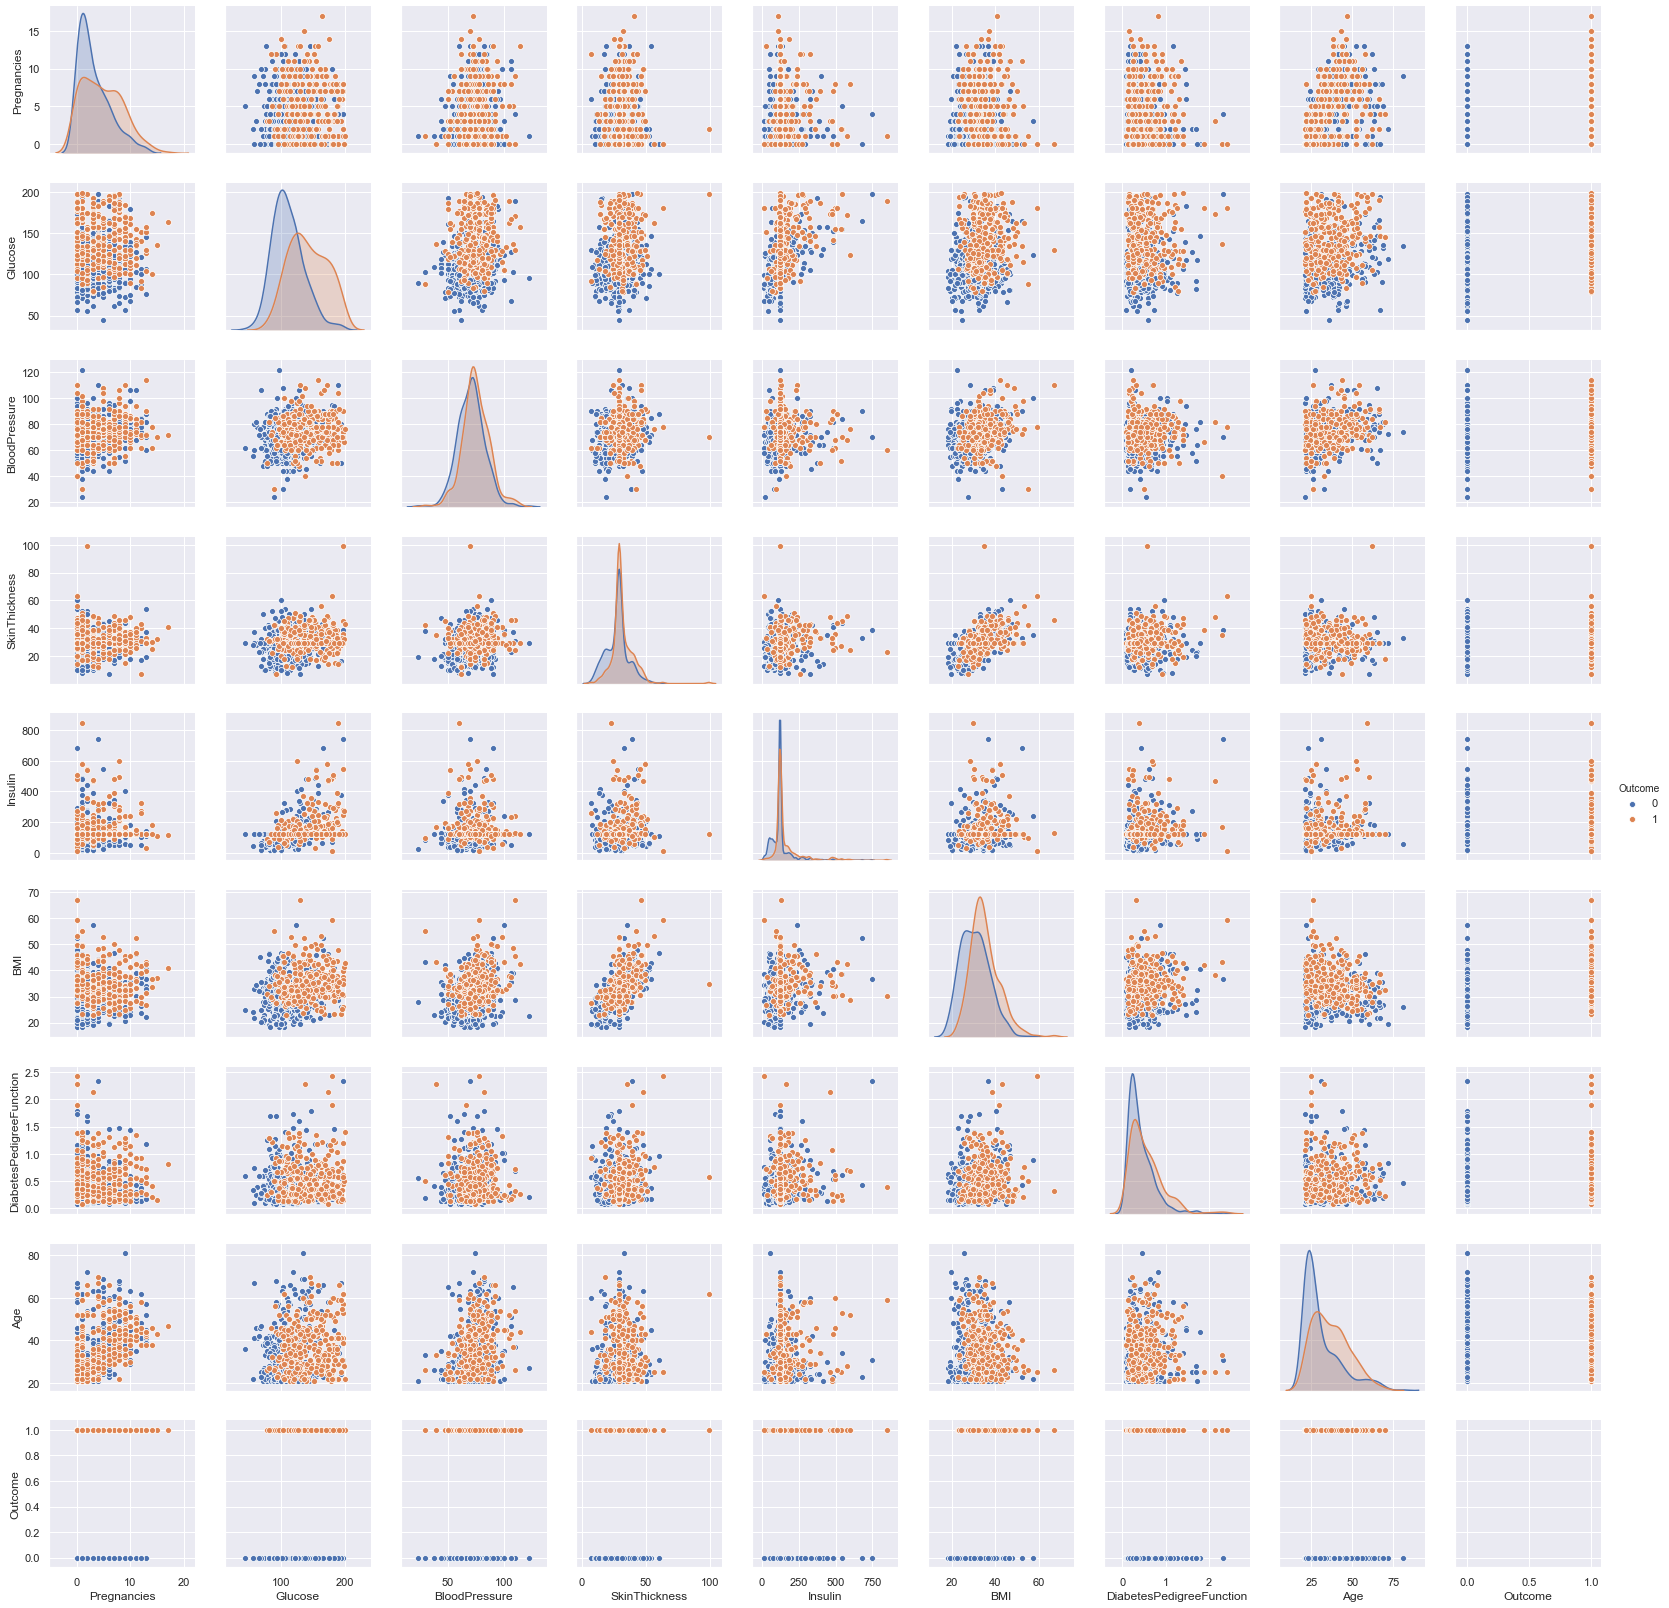

In [18]:
sns.pairplot(diabetes_data,hue = 'Outcome')

In [19]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543162,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180170,0.126503,0.097101,0.203790
BMI,0.021565,0.230941,0.281268,0.543162,0.180170,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.311924,0.173844,0.238356,1.000000


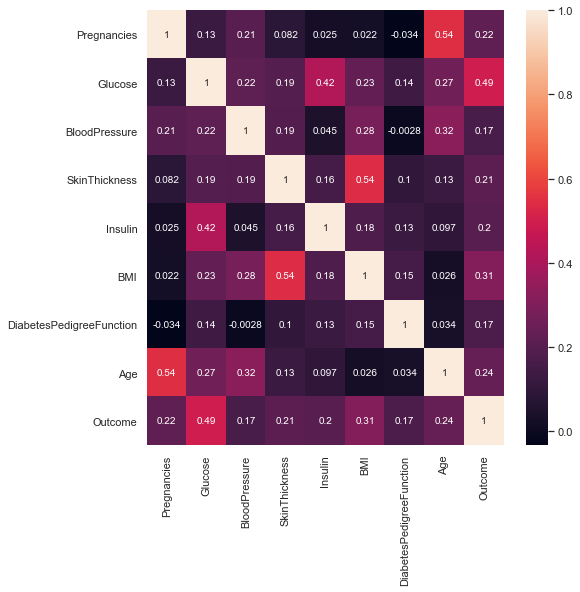

In [20]:
plt.figure(figsize =(8,8))
sns.heatmap(diabetes_data.corr(),annot=True)

In [21]:
X =diabetes_data.drop('Outcome',axis =1)
y =diabetes_data['Outcome']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,test_size =0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


In [23]:
scaler = StandardScaler()

In [24]:
X_train_scaled = scaler.fit_transform(X_train)

In [25]:
X_test_scaled = scaler.fit_transform(X_test)

In [26]:
svc = SVC(kernel ='linear',gamma = 'scale')

In [27]:
svc.fit(X_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
y_pred= svc.predict(X_test_scaled)

In [29]:
print('accuracy_score:' ,accuracy_score(y_test,y_pred))

accuracy_score: 0.7619047619047619


In [30]:
print(np.unique(y_pred))

[0 1]


In [31]:
print(confusion_matrix(y_test,y_pred))

[[137  20]
 [ 35  39]]


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       157
           1       0.66      0.53      0.59        74

    accuracy                           0.76       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



In [33]:
neigh = KNeighborsClassifier()

In [34]:
neigh.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
y_pred= neigh.predict(X_test_scaled)

In [36]:
print('accuracy_score:' ,accuracy_score(y_test,y_pred))

accuracy_score: 0.7835497835497836


In [37]:
print(np.unique(y_pred))

[0 1]


In [38]:
print(confusion_matrix(y_test,y_pred))

[[137  20]
 [ 30  44]]


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.69      0.59      0.64        74

    accuracy                           0.78       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.78      0.78      0.78       231



In [40]:
y_pred_proba = neigh.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds =roc_curve(y_test,y_pred_proba)

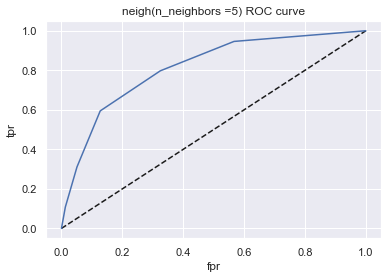

In [41]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'neigh')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('neigh(n_neighbors =5) ROC curve')
plt.show()

In [42]:
roc_auc_score(y_test,y_pred_proba)

0.8130917541745568

In [43]:
rfc = RandomForestClassifier(n_estimators =100,random_state =0)

In [44]:
rfc.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [45]:
y_pred = rfc.predict(X_test_scaled)

In [46]:
print( 'accuracy score :',accuracy_score(y_test,y_pred))

accuracy score : 0.7619047619047619


In [47]:
print(confusion_matrix(y_test,y_pred))

[[134  23]
 [ 32  42]]


In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       157
           1       0.65      0.57      0.60        74

    accuracy                           0.76       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.76      0.76      0.76       231

